# Проект: Анализ гипотез для увеличения выручки интернет-магазина.

В данном проекте нам предстоит выступить в качестве аналитика крупного интернет-магазина, проанализировать гипотезы, составленные с отделом маркетинга для увеличения выручки, приоретизировать их, запустить A/B-тест и проанализировать результаты. 

## Приоретизация гипотез

### Подключение библиотек

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Загрузка данных

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# Приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [4]:
# Рассчитываем ICE и создаем для него отдельный столбец
hypothesis['ICE'] = round (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)

# Увеличиваем ширину столбца, чтобы гипотезы полностью помещались
pd.set_option('max_colwidth', 150)

# Выводим гипотезы в порядке приоретизации по ICE
display(hypothesis[['hypothesis' , 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применение фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [5]:
# Рассчитываем RICE и создаем для него отдельный столбец
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

# Выводим гипотезы в порядке приоретизации по RICE
display(hypothesis[['hypothesis' , 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод: 
Приоритеты гипотез несколько разнятся. Это связано с тем, что RICE учитывает оценку количества пользователей, которых затронут изменения и чем их больше, тем приоритет гипотезы выше. Для ICE этот критерий не учитывается.

Стоит отметить, что в обоих случаях можно выделить приоритетными гипотезы под номерами 7, 0, 6. Несмотря на то, что их приоритет разнится при оценке разными фреймворками, в обоих случаях они вверху нашего "рейтинга". Гипотезы же 4, 5, 3, 1 в обоих случаях имеют низкий приоритет.

## Анализ A/B-теста

### Предобработка данных

In [6]:
# Данные у нас уже загружены, посмотрим на сами таблицы
display(orders.head())
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

In [7]:
display(visitors.head())
display(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

#### Приводим тип данных в столбцах date в обоих датафреймах к типу datetime

In [8]:

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
# Проверяем изменения
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

#### Проверяем дубликаты

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.duplicated().sum()

0

#### Проверим корректность разделения пользователей по группам.


In [12]:

# Отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# Получаем id пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(group_intersections)

58

58 пользователей попали в обе группы. Чтобы избежать искажения данных, удалим записи об этих пользователях

In [13]:
# Перезаписываем orders
orders = orders.query('visitorId not in @group_intersections')

Проверим, что данные удалены

In [14]:
# Отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# Получаем пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(group_intersections)

0

### Построение графика кумулятивной выручки по группам.

Чтобы построить графики, нужно собрать кумулятивные данные. Создадим датафрейм cumulativeData со столбцами:

date — дата;
group — группа A/B-теста (A или B);
orders — кумулятивное количество заказов на указанную дату в указанной группе;
buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [15]:
# Создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.

Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец group не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков

Применим методы к каждой строке датафрейма и отсортируем результаты по столбцам date и group.

Результат запишем в датафрейм ordersAgregated

In [16]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично visitorsAggregated

In [17]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x
['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

In [18]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


Приступаем к построению графика

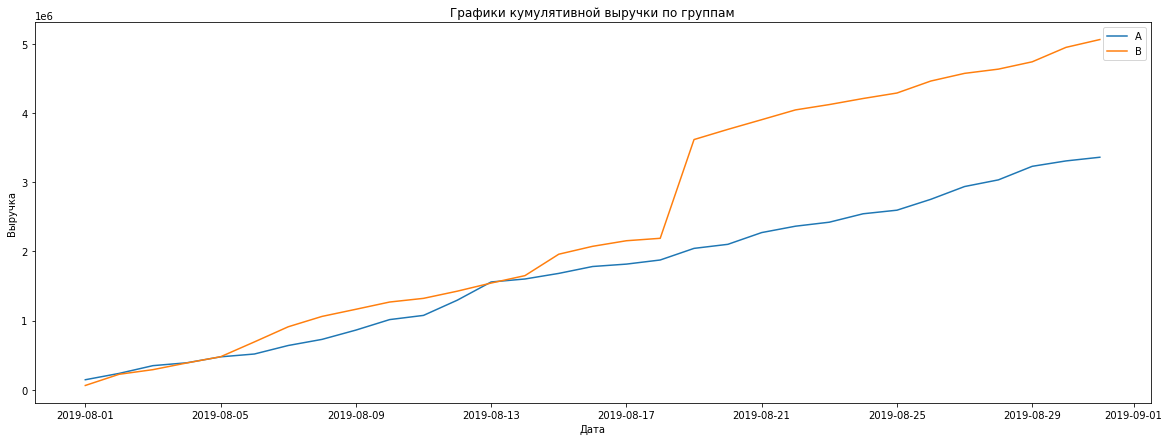

In [19]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
 
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(20,7))
 
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
 
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам')
plt.legend()
plt.show()

#### Вывод

На протяжении всего графика выручка растет в обоих группах; в начале теста выручки в обоих группах примерно одинаковые; после 17.08 наблюдается резкий скачок в группе B, что может быть связано с резким увеличение количества заказов, либо с появлением очень дорогих товаров в выборке; после выброса в группе В выручки стабилизируются и растут практически одинаково. 

### Построение графика кумулятивного среднего чека по группам.

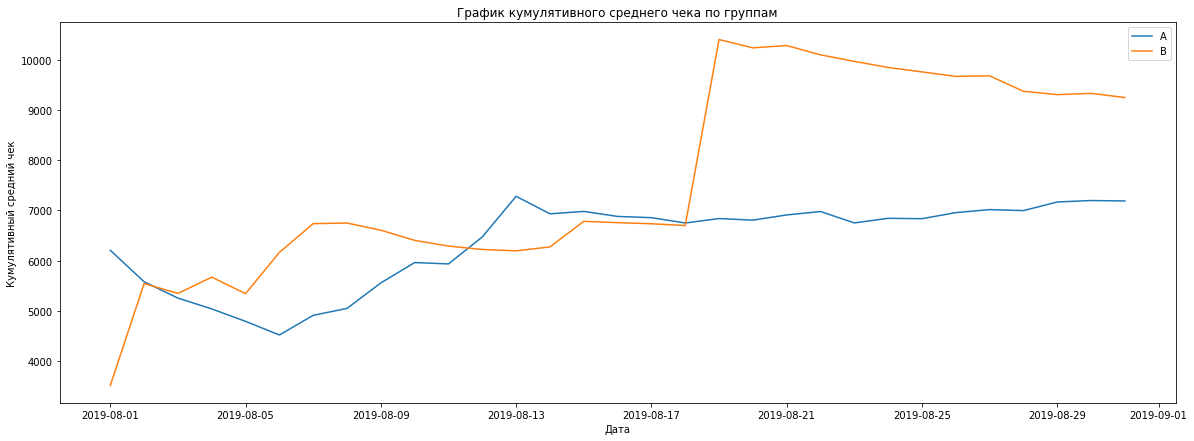

In [20]:
plt.figure(figsize=(20,7))
# График среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# График среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')
plt.legend();

#### Вывод

График группы А стабильнее, к концу теста значения практически равны пиковому, достигнутому 13.08; на графике группы В после 17.08 видим аномальное увеличение среднего чека,а затем снижение; к концу теста данные стабилизируются в обоих группах.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

Text(0, 0.5, 'Кумулятивный cредний чек')

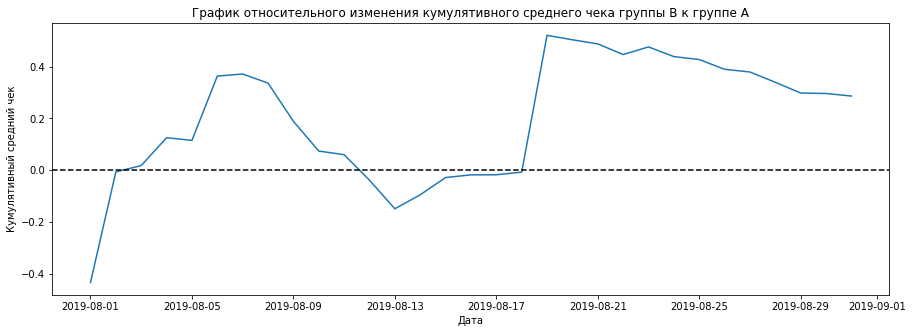

In [21]:
# Собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
 
# Строим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
 
# Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')

#### Вывод

В начале теста лучше себя чувствовали показатели группы B, затем они стали ухудшаться относительно А; ближе к середине теста 13.08 А достигает своих лучших показателей, поэтому график опускается в худшую за время теста для B точку; важно отметить, что на графике различия между сегментами резко изменяются в некоторые даты, например 05.08 или 08.08, но особенно выделяется скачок 18.08, очевидно есть выбросы; после выброса метрика снижается и стремится стабилизироваться.

### Построение графика кумулятивного среднего количества заказов на посетителя по группам.

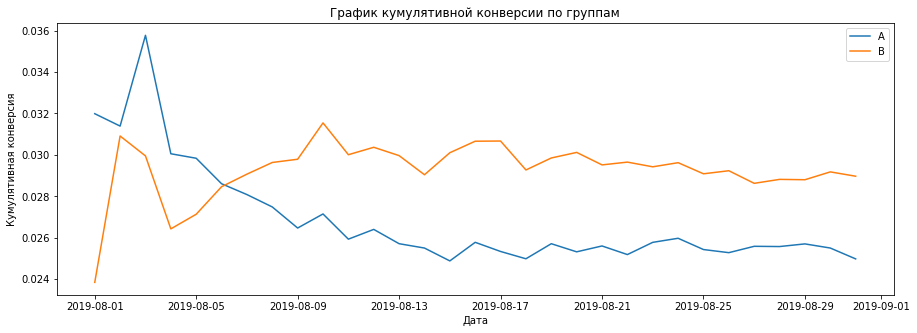

In [22]:
# Считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Строим графики
plt.figure(figsize=(15,5))
 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия');

#### Вывод

В начале видны сильные колебания и конверсия группы А значительно выше конверсии группы В, но 06-07.08 конверсия В начинает преобладать над А; примерно с 20.08 графики стабилизируются; в целом конверсия группы В значительно преобладает над А.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

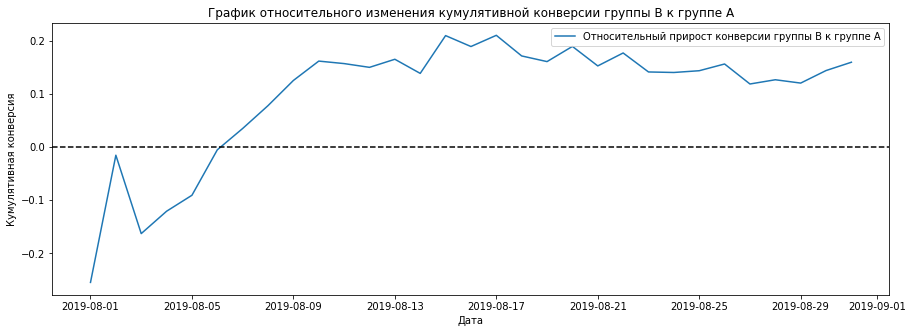

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B к группе A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия');

#### Вывод

С начала теста и до 06.08 метрика группы В была меньше, но затем начала стремительно расти и достигла своего пика 15.08, после она снижается и стремится к стабилизации

### Построение точечного графика количества заказов по пользователям.

In [24]:
# Посмотрим на топ количества заказов в табличном виде
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Text(0, 0.5, 'Количество заказов')

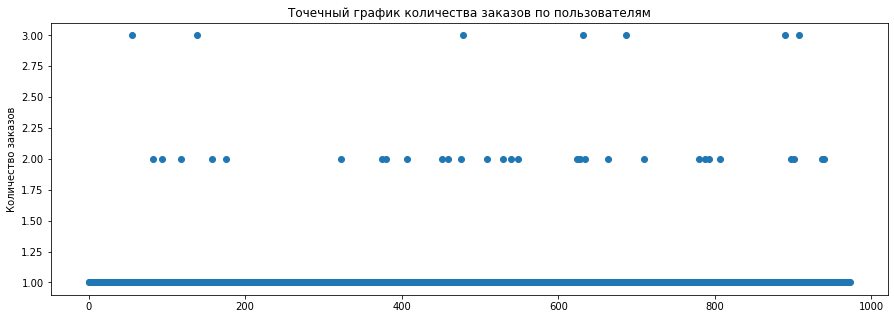

In [25]:
# Строим график

# Серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')

#### Вывод

Чаще всего пользователи делали один заказ, реже - два, некоторое количество пользователей делали по три заказа.

### Расчет 95-го и 99-го перцентилей количества заказов на пользователя.

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


#### Вывод

Не более 5% пользователей оформили больше одного и не более 1% пользователей - больше двух заказов. Целесообразно выбрать 1 заказ на одного пользователя за нижнюю границу "нормального" числа заказов и отсеять аномальных пользователей.

### Построение точечного графика стоимостей заказов.

In [27]:
# Посмотрим в табличном виде топ стоимостей заказов
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


Уже здесь видно, что два самых дорогостоящих заказа принадлежат пользователям группы В, что и может являться причиной всплесков на предыдущих графиках.

Text(0, 0.5, 'Стоимость заказа в млн.')

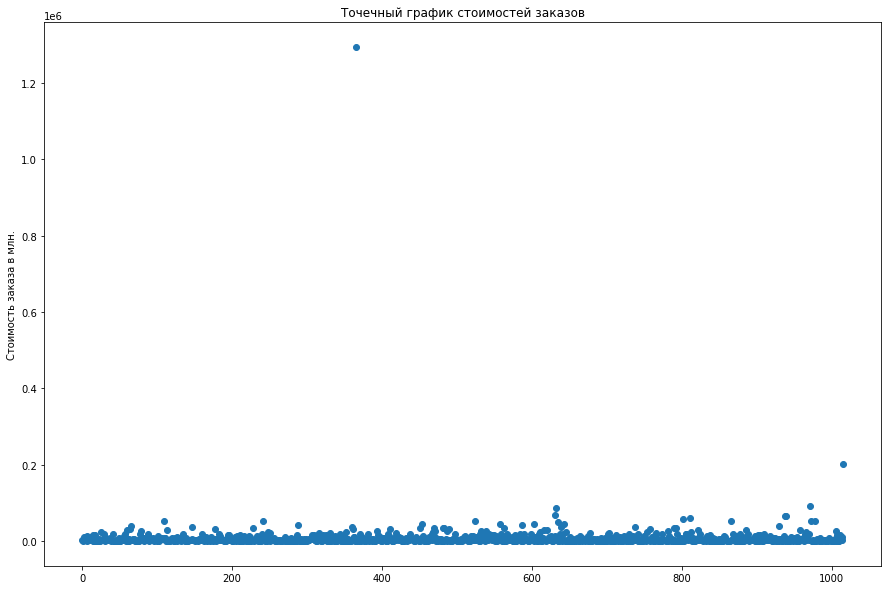

In [28]:
# Строим точечный график
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,10))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн.')


#### Вывод

Здесь выбиваются заказы на сумму 1294500 и 202740, все остальные заказы дешевле 92500. Для того, чтобы точно определить стоимость заказа, которую следует считать аномальной, посчитаем выборочные перцентили.

### Расчет 95-го и 99-го перцентилей стоимостей заказов.

In [29]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


#### Вывод

Не более чем 5% пользователей оформили заказ дороже 26 785, и только не более 1% пользователей оформили на чек дороже 53 904. Границей для определения аномальных заказов следует обозначить до 26 785.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [30]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Гипотезы:  
H0:Статистически значимых различий в среднем количестве заказов на посетителя между группами нет.  
H1:Статистически значимые различия в среднем количестве заказов на посетителя между группами есть.

In [31]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
 
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.011
0.160


#### Вывод

Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу отвергаем, статистически значимые различия есть.
Конверсия группы B превышает конверсию группы А на 16%

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Гипотезы:   
H0:Статистически значимых различий между средними чеками групп А и В нет  
H1:Статистически значимые различия между средними чеками групп А и В есть  

In [32]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


#### Вывод

Первое число — p-value = 0.829 значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий между группами в размере среднего чека нет, принимаем. Наблюдаемое различие в 29% может быть вызвано выбросами. Проверим это далее на очищенных данных.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

За аномальных пользователей примем тех, кто совершил более 1 заказа или совершил заказ дороже 26 785 рублей. Сделаем срезы пользователей с числом заказов больше 2и пользователей, совершивших заказы дороже 26 785. Объединим их в таблице abnormalUsers.

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
86


Получилось 86 аномальных покупателей

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Гипотезы:   
H0:Статистически значимых различий в среднем количестве заказов на посетителя между группами нет.  
H1:Статистически значимые различия в среднем количестве заказов на посетителя между группами есть.

In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [35]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.016
0.174


#### Вывод

Результаты по конверсии значимо не изменились. p-value стал чуть больше на 0,005, что говорит нам о том, что нулевую гипотезу отвергаем и статистически значимые различия есть. Конверсия группы В увеличилась: 17% против 16% на сырых.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

Гипотезы:   
H0:Статистически значимых различий между средними чеками групп А и В нет    
H1:Статистически значимые различия между средними чеками групп А и В есть  

In [36]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.727
-0.034


#### Вывод

p-value уменьшился почти на 0.1, но по прежнему значительно выше 0,05. Разница между средним чеком с 29% в пользу B до 3% в пользу A. Это показывает, что статистически значимых различий по этой метрике между группами нет, а наблюдаемая на неочищенных данных разница, как мы и предполагали, была связана с выбросами.

### Общий вывод

Есть статистически значимые различия по конверсии между группами (как по сырым так и по очищенным данным), при этом преимущество у группы B;   
Нет статистически значимых различий по среднему чеку между группами (как по сырым так и по очищенным данным);   
График различия конверсий между группами показывает, что результаты группы B лучше группы A в конце исследования, при этом есть тенденция к еще небольшому улучшению;   
График различий кумулятивного среднего чека говорит нам о преимуществе группы B только из - за выброса, после чего метрика начинает снижаться к более естественному положению;    

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным в части улучшения конверсии в целевой группе B. В части среднего чека нельзя утверждать, что какая - либо из групп имеет преимущество над другой. Оснований полагать, что при продолжении теста разница между группами в конверсиях либо среднем чеке значимо изменятся нет, т.к. колебания в графиках носят затухающий характер.